In [50]:
from db import db, query, query_list
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
import scipy.stats as st

In [58]:
sns.set_style('darkgrid')

In [3]:
df = query('SELECT * FROM beers_clean')

### Initial EDA

In [53]:
# Missing Values
df.isna().sum()

name                    0
beer_url                0
abv                    74
price                 263
bar_url                 0
size                  307
kind                   17
establishment_type    419
bar_name                0
county_name             0
beer_category          95
origin_zone           318
dtype: int64

In [59]:
df.describe()

,abv,price,size
count,7763.000000,7574.000000,7530.000000
mean,6.316263,9.554831,13.823592
std,2.046017,7.429275,3.563597
min,0.000000,0.550000,1.000000
25%,5.000000,7.000000,12.000000
50%,5.750000,8.000000,12.000000
75%,7.000000,10.000000,16.000000
max,29.000000,350.000000,25.400000


## Quantitative Variables

/Users/rcharan/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rcharan/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


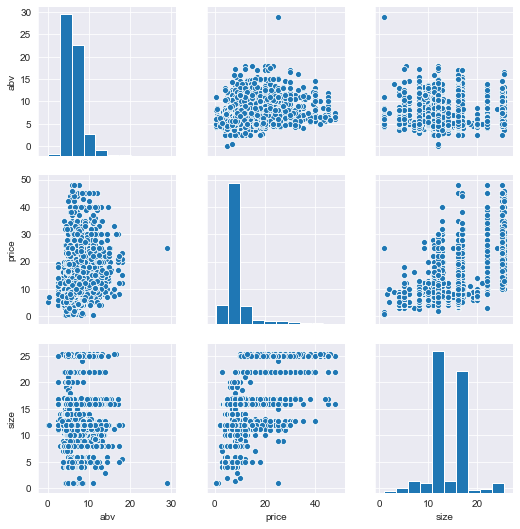

In [67]:
sns.pairplot(df[df.price < 50])

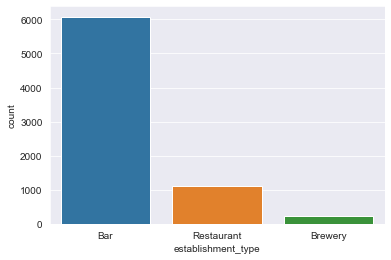

In [72]:
sns.countplot(x = 'establishment_type', data = df)

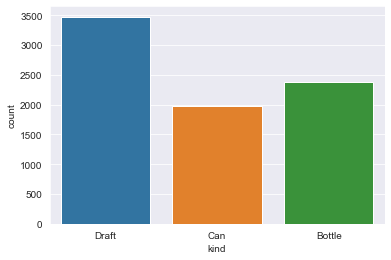

In [73]:
sns.countplot(x = 'kind', data = df)

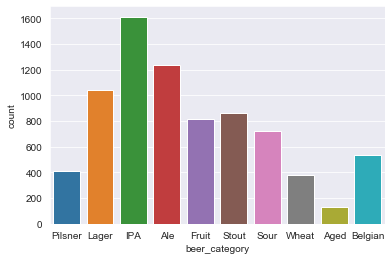

In [74]:
sns.countplot(x = 'beer_category', data = df)

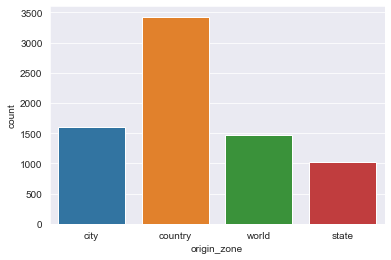

In [75]:
sns.countplot(x = 'origin_zone', data = df)

## Are certain beer styles more popular in each borough?

### Chi-square test for independence

##### H0: Borough has no effect on the popularity of a beer style.

##### Ha: (Style) IPAs are more popular in (borough) Brooklyn.

In [77]:
# Exclude the bronx because it has not enough data
test1_data = df.loc[df.county_name != 'Bronx',['county_name', 'beer_category']].dropna()
test1_table = test1_data.pivot_table(index = 'county_name', columns = 'beer_category', aggfunc = len)
test1_table

beer_category,Aged,Ale,Belgian,Fruit,IPA,Lager,Pilsner,Sour,Stout,Wheat
county_name,,,,,,,,,,
Kings,37,433,134,254,476,306,129,273,280,101
New York,68,589,324,394,870,435,202,362,417,209
Queens,12,130,47,95,186,180,54,56,112,47
Richmond,11,79,33,67,76,124,23,30,48,22


In [76]:
chi2, p, dof, ex = st.chi2_contingency(test1_table)
print(f'chi2 : {chi2}\np    : {p}\ndof  : {dof}')

chi2 : 173.65398219919535
p    : 2.2809906367857478e-23
dof  : 27


In [80]:
# Look at the frequency table
row_freq = test1_table.apply(lambda s : s/s.sum(), axis = 'columns')
round(row_freq*100,1)

beer_category,Aged,Ale,Belgian,Fruit,IPA,Lager,Pilsner,Sour,Stout,Wheat
county_name,,,,,,,,,,
Kings,1.5,17.9,5.5,10.5,19.6,12.6,5.3,11.3,11.6,4.2
New York,1.8,15.2,8.4,10.2,22.5,11.2,5.2,9.4,10.8,5.4
Queens,1.3,14.1,5.1,10.3,20.2,19.6,5.9,6.1,12.2,5.1
Richmond,2.1,15.4,6.4,13.1,14.8,24.2,4.5,5.8,9.4,4.3


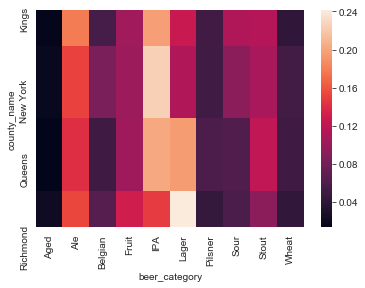

In [81]:
sns.heatmap(row_freq)